# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
path = r'C:\Users\Dan\Desktop\Career Foundry\Achievement 6'

In [34]:
#Import Dataframe
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'Emissions Life Expectancy merged.csv'), index_col = False)

In [35]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# Checking data

In [36]:
df . head()

Unnamed: 0      Country country_code  Year  Total  Coal  Oil  Gas  Cement  \
0           0  Afghanistan          AFG  1750    0.0   0.0  0.0  0.0     0.0   
1           1  Afghanistan          AFG  1751    0.0   0.0  0.0  0.0     0.0   
2           2  Afghanistan          AFG  1752    0.0   0.0  0.0  0.0     0.0   
3           3  Afghanistan          AFG  1753    0.0   0.0  0.0  0.0     0.0   
4           4  Afghanistan          AFG  1754    0.0   0.0  0.0  0.0     0.0   

   Flaring  Other  Per Capita  Life Expectancy Life Expectancy category  
0      0.0    0.0         0.0              NaN                      NaN  
1      0.0    0.0         0.0              NaN                      NaN  
2      0.0    0.0         0.0              NaN                      NaN  
3      0.0    0.0         0.0              NaN                      NaN  
4      0.0    0.0         0.0              NaN                      NaN

In [37]:
df = df.drop('Unnamed: 0', axis=1)

In [38]:
df . head()

Country country_code  Year  Total  Coal  Oil  Gas  Cement  Flaring  \
0  Afghanistan          AFG  1750    0.0   0.0  0.0  0.0     0.0      0.0   
1  Afghanistan          AFG  1751    0.0   0.0  0.0  0.0     0.0      0.0   
2  Afghanistan          AFG  1752    0.0   0.0  0.0  0.0     0.0      0.0   
3  Afghanistan          AFG  1753    0.0   0.0  0.0  0.0     0.0      0.0   
4  Afghanistan          AFG  1754    0.0   0.0  0.0  0.0     0.0      0.0   

   Other  Per Capita  Life Expectancy Life Expectancy category  
0    0.0         0.0              NaN                      NaN  
1    0.0         0.0              NaN                      NaN  
2    0.0         0.0              NaN                      NaN  
3    0.0         0.0              NaN                      NaN  
4    0.0         0.0              NaN                      NaN

In [39]:
df . shape

(58807, 13)

In [40]:
# Check for missing values

df.isnull().sum()

Country                         0
country_code                    0
Year                            0
Total                           0
Coal                            0
Oil                             0
Gas                             0
Cement                          0
Flaring                         0
Other                           0
Per Capita                      0
Life Expectancy             46935
Life Expectancy category    46935
dtype: int64

In [41]:
# removing rows which contain missing values in the life expectancy column
df.dropna(subset=['Life Expectancy'], inplace=True)

In [42]:
df.isnull().sum()

Country                     0
country_code                0
Year                        0
Total                       0
Coal                        0
Oil                         0
Gas                         0
Cement                      0
Flaring                     0
Other                       0
Per Capita                  0
Life Expectancy             0
Life Expectancy category    0
dtype: int64

In [43]:
df . head()

Country country_code  Year     Total      Coal       Oil  Gas  \
210  Afghanistan          AFG  1960  0.413885  0.127115  0.268758  0.0   
211  Afghanistan          AFG  1961  0.490798  0.175872  0.293120  0.0   
212  Afghanistan          AFG  1962  0.688594  0.296784  0.362736  0.0   
213  Afghanistan          AFG  1963  0.706736  0.263808  0.392048  0.0   
214  Afghanistan          AFG  1964  0.838551  0.300448  0.476320  0.0   

       Cement  Flaring  Other  Per Capita  Life Expectancy  \
210  0.018012      0.0    0.0    0.048001           32.535   
211  0.021806      0.0    0.0    0.055835           33.068   
212  0.029074      0.0    0.0    0.076775           33.547   
213  0.050880      0.0    0.0    0.077176           34.016   
214  0.061783      0.0    0.0    0.089632           34.494   

    Life Expectancy category  
210      Low Life Expectancy  
211      Low Life Expectancy  
212      Low Life Expectancy  
213      Low Life Expectancy  
214      Low Life Expectancy

In [44]:
df . shape

(11872, 13)

In [45]:
# checking for duplicates
dups = df.duplicated()

In [46]:
dups . shape

(11872,)

In [47]:
# extreme values check
sns.distplot(df['Life Expectancy'], bins=10)

C:\Users\Dan\AppData\Local\Temp\ipykernel_15276\2390802588.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Life Expectancy'], bins=10)


<Axes: xlabel='Life Expectancy', ylabel='Density'>

In [48]:
sns.distplot(df['Per Capita'], bins=5)

C:\Users\Dan\AppData\Local\Temp\ipykernel_15276\190717123.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Per Capita'], bins=5)


<Axes: xlabel='Per Capita', ylabel='Density'>

all seems fine to proceed

# Data prep for regression analysis

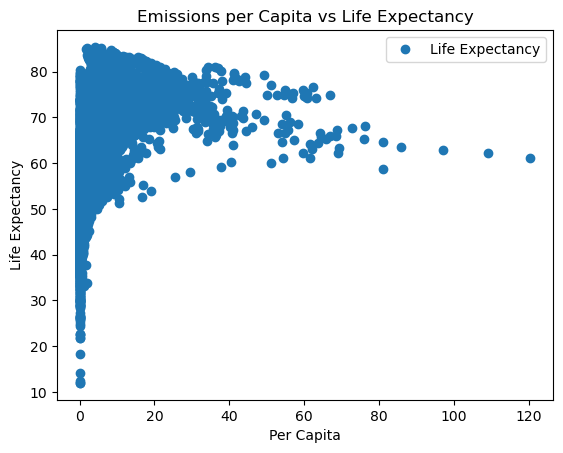

In [49]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Per Capita', y='Life Expectancy',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Emissions per Capita vs Life Expectancy')  
plt.xlabel('Per Capita')  
plt.ylabel('Life Expectancy')  
plt.show()

In [50]:
# I just want to check the lowest life expectancy
df['Life Expectancy'].min() 

11.995

In [51]:
df['Life Expectancy'].idxmin()

8626

In [52]:
df.loc[8626]

Country                                Cambodia
country_code                                KHM
Year                                       1975
Total                                  0.047632
Coal                                        0.0
Oil                                    0.047632
Gas                                         0.0
Cement                                      0.0
Flaring                                     0.0
Other                                       0.0
Per Capita                              0.00708
Life Expectancy                          11.995
Life Expectancy category    Low Life Expectancy
Name: 8626, dtype: object

In [54]:
# I have researched the lowest values in the df concerning life expectancy, many of which are under 18 years of age, these are down to genocides and civil wars in these countries
#so i will remove these 10 lowest values for the purpose of this analysis
df.drop(df['Life Expectancy'].nsmallest(10).index, inplace=True)

In [55]:
df['Life Expectancy'].min()

24.427

In [56]:
df['Life Expectancy'].max()

85.3878048780488

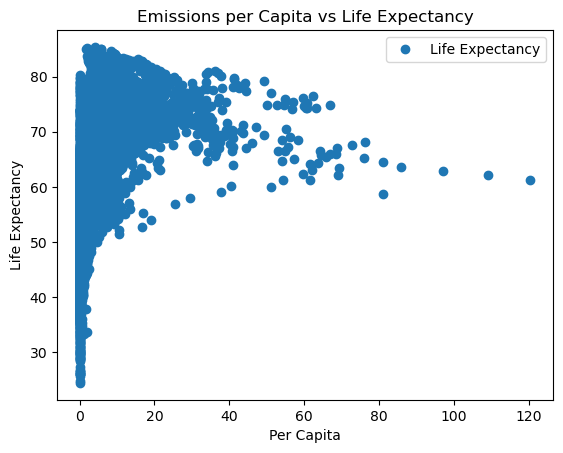

In [57]:
# new scatterplot
df.plot(x = 'Per Capita', y='Life Expectancy',style='o') 
plt.title('Emissions per Capita vs Life Expectancy')  
plt.xlabel('Per Capita')  
plt.ylabel('Life Expectancy')  
plt.show()

In [58]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Per Capita'].values.reshape(-1,1)
y = df['Life Expectancy'].values.reshape(-1,1)

In [59]:
X

array([[0.048001],
       [0.055835],
       [0.076775],
       ...,
       [4.792753],
       [4.775633],
       [4.497423]])

In [60]:
y

array([[32.535     ],
       [33.068     ],
       [33.547     ],
       ...,
       [72.78523684],
       [72.97684987],
       [72.26501127]])

In [61]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [62]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [63]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

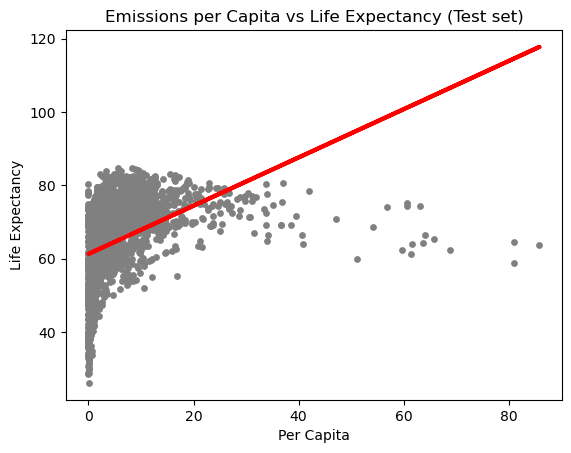

In [65]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Emissions per Capita vs Life Expectancy (Test set)')
plot_test.xlabel('Per Capita')
plot_test.ylabel('Life Expectancy')
plot_test.show()

In [66]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [67]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.65804209]]
Mean squared error:  107.74602982512133
R2 score:  0.16348735811224346


In [68]:
y_predicted

array([[65.10543601],
       [61.49186763],
       [61.34608235],
       ...,
       [62.73977799],
       [62.05395139],
       [66.74565198]])

In [69]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual  Predicted
0   67.675610  65.105436
1   54.760000  61.491868
2   55.865000  61.346082
3   52.632000  61.490384
4   43.429000  61.572906
5   48.161000  61.527380
6   76.200000  63.564720
7   46.196000  62.569992
8   76.537317  66.709413
9   51.464000  61.317424
10  71.016000  65.065655
11  57.097000  62.217563
12  69.707000  62.034190
13  37.695000  61.297378
14  51.383000  61.422649
15  82.239024  65.677805
16  65.746000  61.670536
17  70.568561  62.572743
18  65.816000  62.150647
19  58.652000  61.354743
20  60.319000  61.951023
21  73.875610  64.951938
22  76.600000  65.853477
23  43.940000  61.534718
24  39.008000  61.387640
25  73.569000  78.826189
26  40.147000  61.300717
27  59.875000  61.443736
28  52.715000  61.489627
29  47.742000  61.301457

## Compare how the regression fits the training set

In [70]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [71]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [72]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.65804209]]
Mean squared error:  107.25992124348059
R2 score:  0.17347746535751496


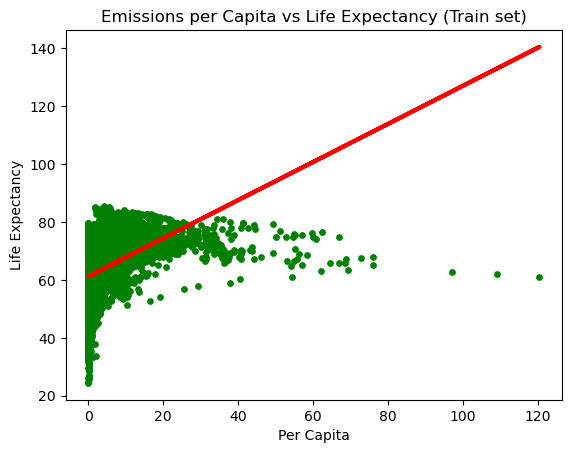

In [73]:
# Visualising the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Emissions per Capita vs Life Expectancy (Train set)')
plot_test.xlabel('Per Capita')
plot_test.ylabel('Life Expectancy')
plot_test.show()

What I can see here is that the regression line isn't the best fit to the data. The data seems to correspond to the slope when X is lower but then it changes and runs in a negative direction. The MSE of 107 confirms the poor performance for me. I don't think regression is the best way to represent this data. The R2 score is low which also suggests a bad fit, so overall the model isn't performing well. 
There is also a big difference between the actual and predicted y values in the comparison dataset. This just adds evidence that the model isn’t doing a great job of explaining the relationship between emissions per capita and the life expectancy variables. The relationship simply doesn’t follow a single, straight regression line so a single, straight regression line won’t be able to accurately predict anything. The R2 scores are similar which means the model isn't overfitted. 

Early hypotheses I wrote (see below) can not be ruled out by these findings

The first time emissions per capita increase, life expectancy will increase within 30 years.

Once emissions per capita reaches 10 metric tons, the increase in life expectancy will slow.

Once the country has become developed and they reduce emissions per capita to below 10 metric tons, life expectancy will change.

The initial increase in a country's emissions per capita leads to an increase in life expectancy, due to an improvement in quality of life factors linked to country development, up to a point where emissions per capita begin to have a negative affect on quality of life